In [1]:
import torch
import torch.nn as nn
import numpy as np
import os

In [2]:
influence_raw_paths = {
  'imagenet':'../dino/encoders/imagenet',
  'places':'../dino/encoders/places',
  'fast2leaves_shaders_shaders_mixup-2-2-1':'../dino/encoders/fast2leaves_shaders_shaders_mixup-2-2-1',
  'fast2leaves_shaders_shaders':'../dino/encoders/fast2leaves_shaders_shaders',
  'shaders_mixup':'../dino/encoders/shaders_mixup',
  'shaders':'../dino/encoders/shaders',
  'stylegan':'../dino/encoders/stylegan-oriented-512',
  'random':'../dino/encoders/random/knn'
}

In [3]:
influence_raw_tensors = {}
for k,v in influence_raw_paths.items():
  influence_raw_good = torch.load(os.path.join(v, 'run_influence', 'influence_raw_good.pth'))
  influence_raw_bad = torch.load(os.path.join(v, 'run_influence', 'influence_raw_bad.pth'))
  influence_raw_tensors[k] = (influence_raw_bad, influence_raw_bad)

In [ ]:
influence_raw_tensors['imagenet'][0], influence_raw_tensors['imagenet'][0].shape

(tensor([[     61,   34445],
         [     61,   34943],
         [     61,   34409],
         ...,
         [  49992, 1239826],
         [  49999,  759078],
         [  49999,  759624]]),
 torch.Size([7983, 2]))

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from adjustText import adjust_text

def custom_scatterplot(
    x, y, point_labels, point_colors, 
    legend_labels, legend_colors, 
    x_label, y_label, title, y_limits=None, use_legend=True):
    """
    Creates a scatter plot with customizable points, labels, and an independent legend.
    Includes automatic text adjustment to minimize overlaps.
    
    Parameters:
    - x: List of x-coordinates for the points.
    - y: List of y-coordinates for the points.
    - point_labels: List of text labels for each point.
    - point_colors: List of colors for each point.
    - legend_labels: List of labels for the independent legend.
    - legend_colors: List of colors for the independent legend.
    - x_label: Label for the X-axis.
    - y_label: Label for the Y-axis.
    - title: Title of the plot.
    - y_limits: Tuple specifying the y-axis limits (y_min, y_max). Default is None.
    """
    plt.figure(figsize=(5, 3))
    
    # Scatter plot points
    texts = []
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color=point_colors[i])  # Plot point
        # Create text labels with matching color and increased font size
        texts.append(plt.text(
            x[i], y[i], point_labels[i], fontsize=12, ha='center', va='center',
        ))
    
    # Adjust text positions to avoid overlap
    adjust_text(texts)
    
    if use_legend:
        # Add independent legend with increased font size
        for label, color in zip(legend_labels, legend_colors):
            plt.scatter([], [], color=color, label=label)  # Dummy scatter points for legend
        
        plt.legend(title=None, loc='upper left', fontsize=12, title_fontsize=12)
    
    # Set axis labels and title with increased font size
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(None, fontsize=14)

    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}%"))
    
    # Set y-axis limits if provided
    if y_limits is not None:
        plt.ylim(y_limits)

    plt.savefig(f'./figures/{x_label.replace(" ", "_").lower()}.pdf')
    
    # Add grid and show the plot
    plt.grid(True)
    plt.show()


### Number of non-private training data

In [10]:
for k,v in influence_raw_tensors.items():
  (influence_raw_good, influence_raw_bad) = influence_raw_tensors[k]
  influential_train_points = len(np.unique(torch.concatenate([influence_raw_good[:, 1], influence_raw_bad[:, 1]])))
  print(k, influential_train_points)

imagenet 7798
places 8893
fast2leaves_shaders_shaders_mixup-2-2-1 7187
fast2leaves_shaders_shaders 6976
shaders_mixup 6685
shaders 6547
stylegan 4036
random 596


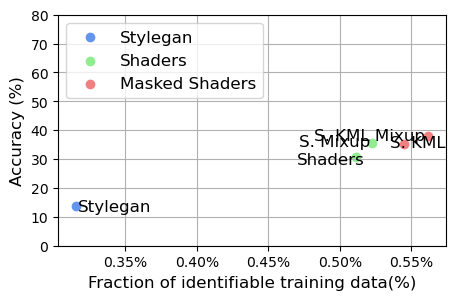

In [12]:
N = 1.28e6
x = [7187, 6976, 6685, 6547, 4036]
x = [100 * v / N for v in x]
y = [37.88, 35.38, 35.45, 30.69, 13.73]
point_labels = ['S. KML Mixup', 'S. KML', 'S. Mixup', 'Shaders', 'Stylegan']
point_colors = ['lightcoral', 'lightcoral', 'lightgreen', 'lightgreen', 'cornflowerblue']
legend_labels = ["Masked Shaders", "Shaders", "Stylegan"][::-1]
legend_colors = ['lightcoral', 'lightgreen', 'cornflowerblue'][::-1]
x_label = 'Fraction of identifiable training data(%)'
y_label = 'Accuracy (%)'
title = 'Non-private data according to differential privacy'

custom_scatterplot(x, y, point_labels, point_colors, legend_labels, legend_colors, x_label, y_label, title, y_limits=[0, 80], use_legend=True)